In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import cv2
from sklearn.decomposition import PCA

In [2]:
def feature_extraction():
    img = cv2.imread('E:/To be deleted later/download.jpg',0)
    pca = PCA(n_components=4)
    X_pca = pca.fit_transform(img)
    X_pca = X_pca.transpose()
    X = pca.fit_transform(X_pca)
    X = X.transpose()
    X = X.reshape(16,1)
    return X

In [3]:
def normalisation(X):
    d = np.dot(X.transpose(),X)
    print(d)
    X = X/np.sqrt(d) 
    return X

In [4]:
def amplitudes_to_theta(amp,n):
    theta = []

    for s in range(n):
        for j in range(2**(n-1-s)):
            s1=0
            s2=0
            for l in range(2**(s)):
                s1 = s1+amp[(2*(j+1)-1)*(2**(s))+l]**2
            for l in range(2**(s+1)):
                s2 = s2+amp[(j)*(2**(s+1))+l]**2
            if s1==0 and s2==0:
                p = [0.0]
            else:
                p = 2*np.arcsin(np.sqrt(s1/s2))
            theta.append(p)
    return theta
#amp=[np.sqrt(0.2),0.0,np.sqrt(0.5),0,0,0,np.sqrt(0.2),np.sqrt(0.1)]
#amp=[0,0,0,0.8,0,0,0.6,0]
        
            

In [5]:
def state_prep_circ(qc,theta,n,q):
    if abs(theta[14]) >= 1e-15:
        qc.ry(theta[14],q[3])
    if abs(theta[13]) >= 1e-15:
        qc.mcry(theta[13],[q[3]],q[2],[]) 
    if abs(theta[12]) >= 1e-15:
        qc.x(q[3])
        qc.mcry(theta[12],[q[3]],q[2],[])
        qc.x(q[3])        
    if abs(theta[11]) >= 1e-15:
        qc.mcry(theta[11],[q[3],q[2]],q[1],[])
    if abs(theta[10]) >= 1e-15:
        qc.x(q[2])
        qc.mcry(theta[10],[q[3],q[2]],q[1],[])
        qc.x(q[2])
    if abs(theta[9]) >= 1e-15:
        qc.x(q[3])
        qc.mcry(theta[9],[q[3],q[2]],q[1],[])
        qc.x(q[3])
    if abs(theta[8]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.mcry(theta[8],[q[3],q[2]],q[1],[])
        qc.x(q[3])
        qc.x(q[2])
    if abs(theta[7]) >= 1e-15:
        qc.mcry(theta[7],[q[3],q[2],q[1]],q[0],[])        
    if abs(theta[6]) >= 1e-15:
        qc.x(q[1])
        qc.mcry(theta[6],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[1])
    if abs(theta[5]) >= 1e-15:
        qc.x(q[2])
        qc.mcry(theta[5],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[2])
    if abs(theta[4]) >= 1e-15:
        qc.x(q[2])
        qc.x(q[1])
        qc.mcry(theta[4],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[2])
        qc.x(q[1])
    if abs(theta[3]) >= 1e-15:
        qc.x(q[3])
        qc.mcry(theta[3],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
    if abs(theta[2]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[1])
        qc.mcry(theta[2],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[1])
    if abs(theta[1]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.mcry(theta[1],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[2])
    if abs(theta[0]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.x(q[1])
        qc.mcry(theta[0],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[2])
        qc.x(q[1])
    return qc



In [6]:
def phase_circ(n,qc,q,w):
    theta = []
    for s in range(1,n+1):
        for j in range(1,2**(n-s)+1):
            s1=0
            s2=0
            for l in range(1,2**(s-1)+1):
                s1 = s1+w[(2*j-1)*(2**(s-1))+l-1]
                s2 = s2+w[(2*j-2)*(2**(s-1))+l-1]
                #print((2*j-2)*(2**(s-1))+l)
                #print((2*j-1)*(2**(s-1))+l)
            p = (s1-s2)/(2**(s-1))
            #print(2**(s-1))
            #print(s1,s2,p)
            theta.append(p)
    
    print(theta)
    if abs(theta[14]) >= 1e-15:
        qc.rz(0,q[3])
        qc.barrier()
    if abs(theta[13]) >= 1e-15:
        qc.mcrz(theta[13],[q[3]],q[2],[]) 
        qc.barrier()
    if abs(theta[12]) >= 1e-15:
        qc.x(q[3])
        qc.mcrz(theta[12],[q[3]],q[2],[])
        qc.x(q[3])  
        qc.barrier()
    if abs(theta[11]) >= 1e-15:
        qc.mcrz(theta[11],[q[3],q[2]],q[1],[])
        qc.barrier()
    if abs(theta[10]) >= 1e-15:
        qc.x(q[2])
        qc.mcrz(theta[10],[q[3],q[2]],q[1],[])
        qc.x(q[2])
        qc.barrier()
    if abs(theta[9]) >= 1e-15:
        qc.x(q[3])
        qc.mcrz(theta[9],[q[3],q[2]],q[1],[])
        qc.x(q[3])
        qc.barrier()
    if abs(theta[8]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.mcrz(theta[8],[q[3],q[2]],q[1],[])
        qc.x(q[3])
        qc.x(q[2])
        qc.barrier()
    if abs(theta[7]) >= 1e-15:
        qc.mcrz(theta[7],[q[3],q[2],q[1]],q[0],[])
        qc.barrier()
    if abs(theta[6]) >= 1e-15:
        qc.x(q[1])
        qc.mcrz(theta[6],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[1])
        qc.barrier()
    if abs(theta[5]) >= 1e-15:
        qc.x(q[2])
        qc.mcrz(theta[5],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[2])
        qc.barrier()
    if abs(theta[4]) >= 1e-15:
        qc.x(q[2])
        qc.x(q[1])
        qc.mcrz(theta[4],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[2])
        qc.x(q[1])
        qc.barrier()
    if abs(theta[3]) >= 1e-15:
        qc.x(q[3])
        qc.mcrz(theta[3],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.barrier()
    if abs(theta[2]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[1])
        qc.mcrz(theta[2],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[1])
        qc.barrier()
    if abs(theta[1]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.mcrz(theta[1],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[2])
        qc.barrier()
    if abs(theta[0]) >= 1e-15:
        qc.x(q[3])
        qc.x(q[2])
        qc.x(q[1])
        qc.mcrz(theta[0],[q[3],q[2],q[1]],q[0],[])
        qc.x(q[3])
        qc.x(q[2])
        qc.x(q[1])
        qc.barrier()
    return qc


    

In [7]:
#### QFT BEGINS ####
def mQFT(n,qc):
    for qubit in range(n):
        qc.h(n-1-qubit)
        for otherqubit in range(qubit+1,n):
            qc.cu3(0,0,np.pi/(2**(n-1-qubit-(n-1-otherqubit))),n-1-otherqubit,n-1-qubit)
    qc.swap(0,3)
    qc.swap(1,2)
    return qc


13291.0


C:\Users\v\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-27 09:11:36,432: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
SET 0 DONE
15129.0


ibmqfactory.load_account:WARNING:2020-11-27 09:18:12,898: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
SET 1 DONE


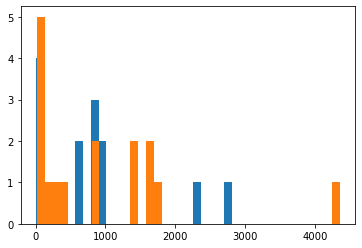

In [9]:
p = []
for j in range(2):
    
    ############################  Recieving DATA  #####################################
    
    lines = open('E:/To be deleted later/VELA DATA/ch00_B0833-45_20150612_191438_010_4').read().splitlines()
    i=0
    data = []
    north_intensity = []
    south_intensity = []
    for k in range(16*j,16*(j+1)):
        myline = lines[k]
        columns = myline.split()
        data.append(columns)
        north_intensity.append(int(data[i][0])**2)
        south_intensity.append(int(data[i][1])**2)
        i+=1

    range_of_data2 = max(north_intensity)+min(north_intensity)
    intervals  = 110
    bins_intensity = int(range_of_data2/intervals)
    n , bins2 , patch = plt.hist(north_intensity , bins = bins_intensity)
    X = np.sqrt(north_intensity)
    
    ###################################################################################
    
    ########################### AUTOMATED PROCESS OF CREATING A QUANTUM CIRCUIT  ######################################
    
    n=4
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q,c)
    X = normalisation(X)
    theta = amplitudes_to_theta(X,n)         ## FUNCTION TO GENERATE ROTATION GATE ANGLES
    qc = state_prep_circ(qc,theta,n,q)       ## FUNCTION TO ENCODE THE SIGNALS INTO QUANTUM SYSTEM
    qc.barrier()
    qc = mQFT(n,qc)                          ## FUNCTION TO CREATE CIRCUIT FOR QUAUNTUM FOURIER TRANSFORM
    qc.measure(q,c)
    qc.draw(output='mpl')
    
    ##################################################################################################################

    ################# RUNING THE QUANTUM CIRCUTI ON A REAL QUANTUM COMPUTER  #####################
    
    IBMQ.load_account()
    provider = IBMQ.get_provider('ibm-q')
    q = provider.get_backend('ibmq_valencia')
    job = execute(qc, backend = q, shots=1000)
    job_monitor(job)
    result = job.result()
    count = result.get_counts(qc)
    
    #####################################################################################
    
    ################ Post processing ######################
    o = []
    for i in count:
        o.append(count[i]/1000)

    for i in range(16):
        p.append(o[i])
    
    #######################################################
    print("SET "+str(j)+" DONE")

########################## PLOTING POWER SPECTRAL DENSITY ###########################

    

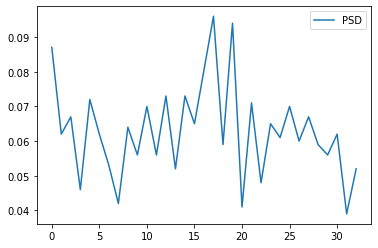

In [10]:
import matplotlib.pyplot as plt    

_ = np.linspace(0, 32, 32)
x = []
for i in range(32):
    x.append(round(_[i]))
    
# Plot the data

plt.plot(x, p, label='PSD')

# Add a legend
plt.legend()

# Show the plot
plt.show()


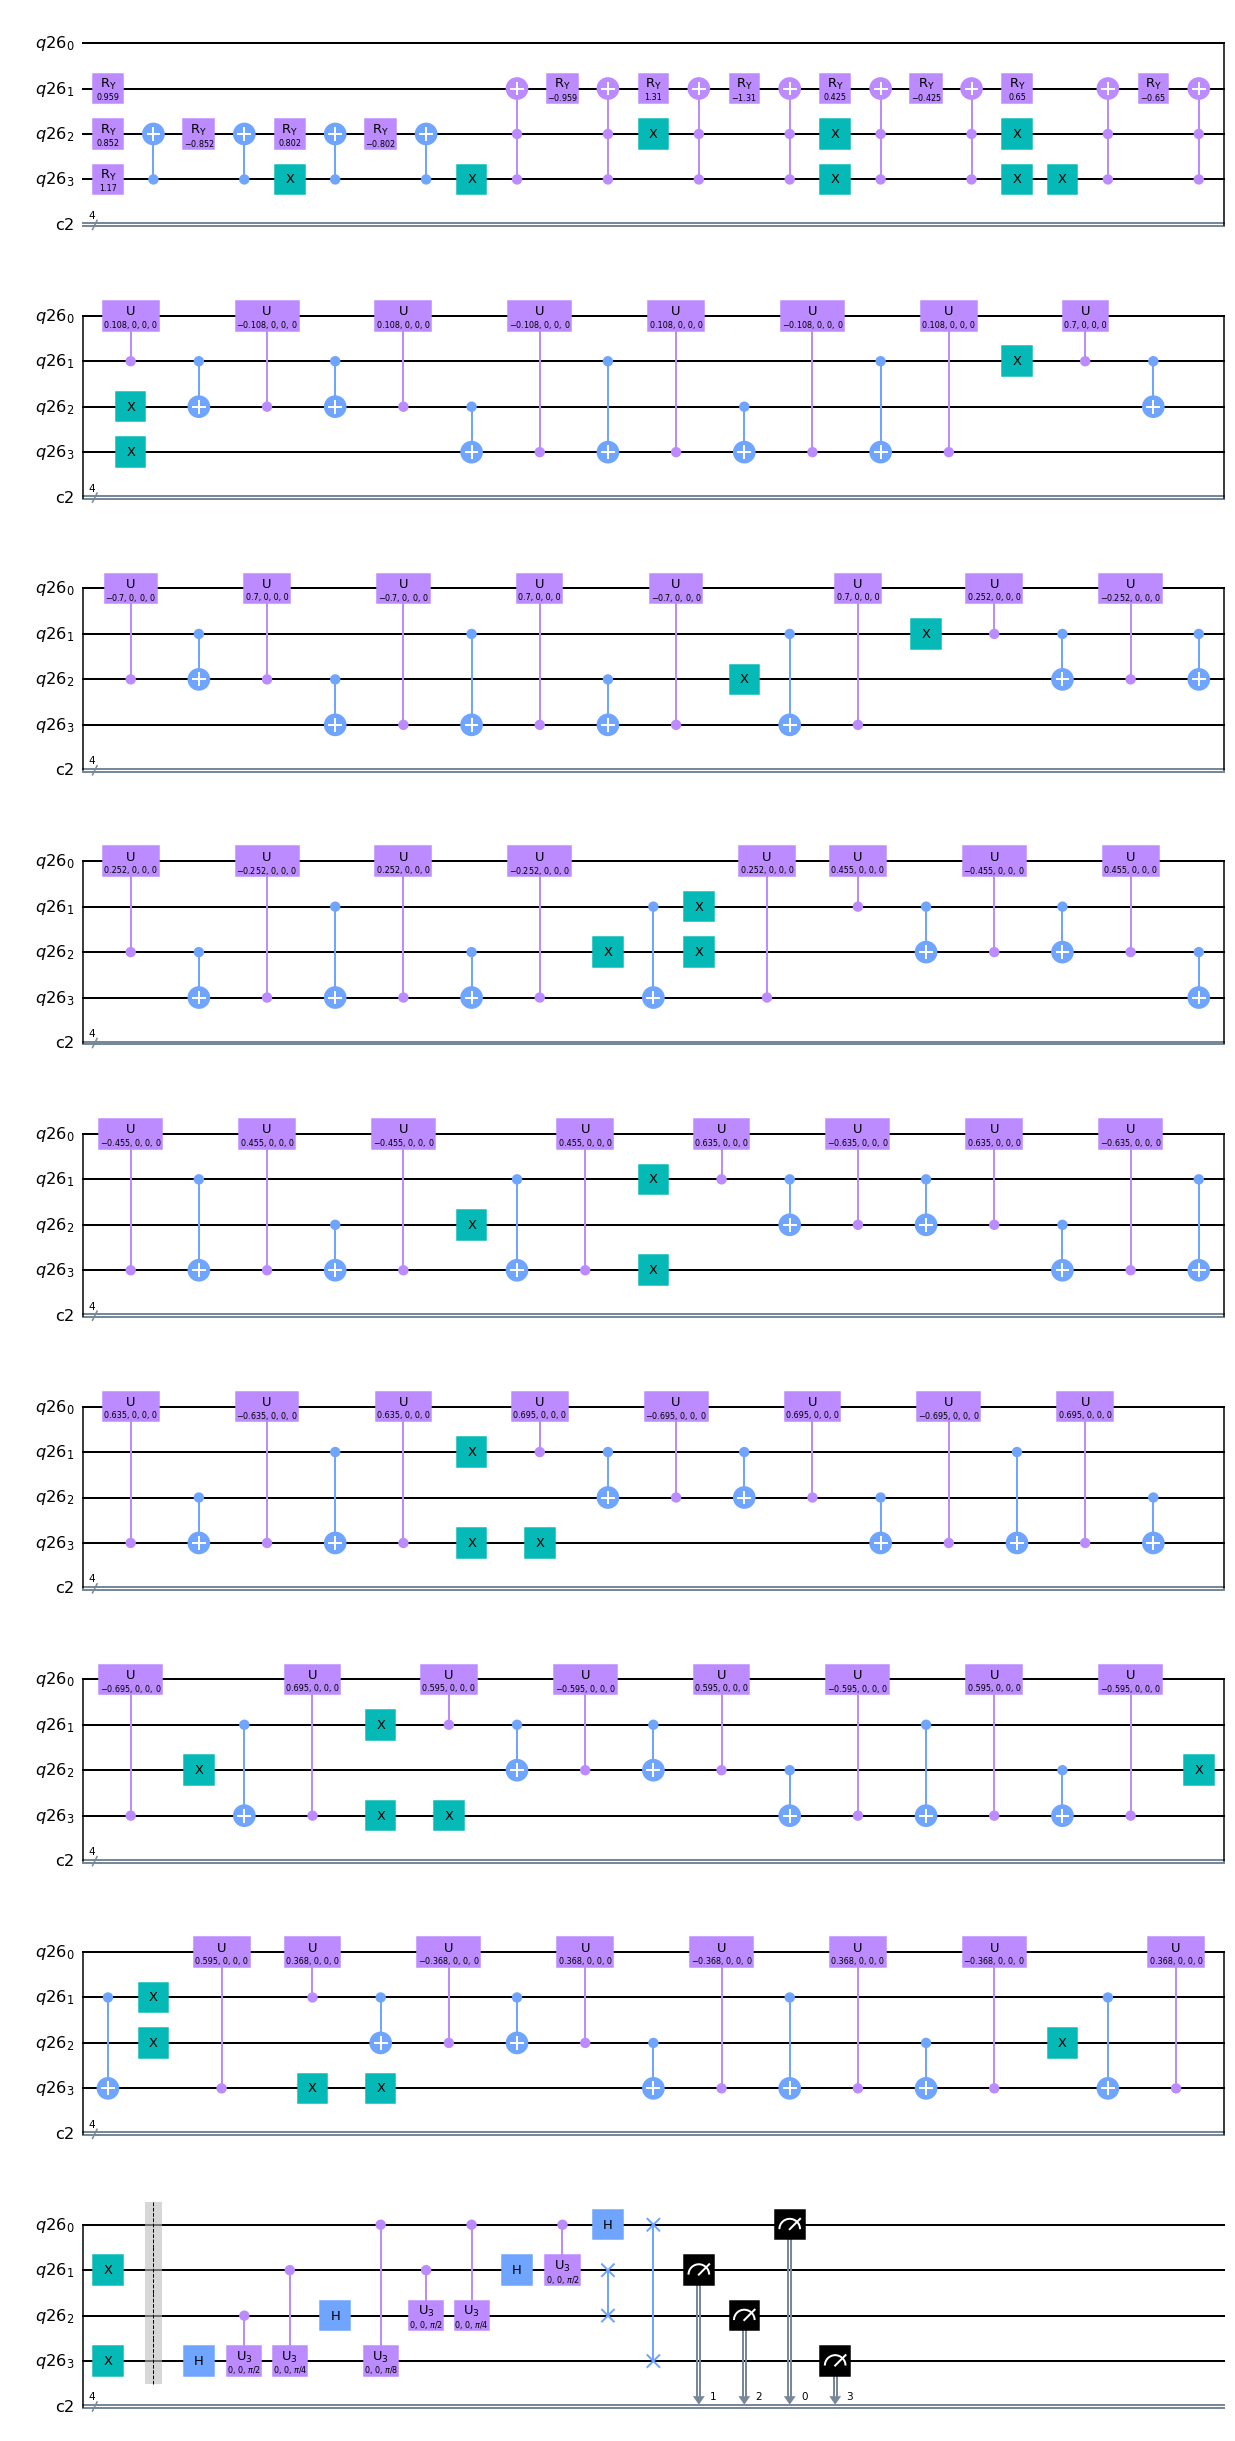

In [11]:
qc.draw(output = 'mpl')